In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('C:\\Users\\david\\movies_metadata.csv', low_memory=False)

# Convert to numeric with coercion
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Drop NaNs and filter out unrealistic values
df = df[(df['budget'] > 10000) & (df['revenue'] > 10000)]

# Parse dates
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df[df['release_date'].notna()]
df['release_year'] = df['release_date'].dt.year

# Feature engineering
df['profit'] = df['revenue'] - df['budget']

# Check final result
print(df.shape)
df.head()


(5277, 26)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,profit
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,343554033.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,197797249.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,65452156.0
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,1995,127436818.0
8,False,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,1995,29350171.0


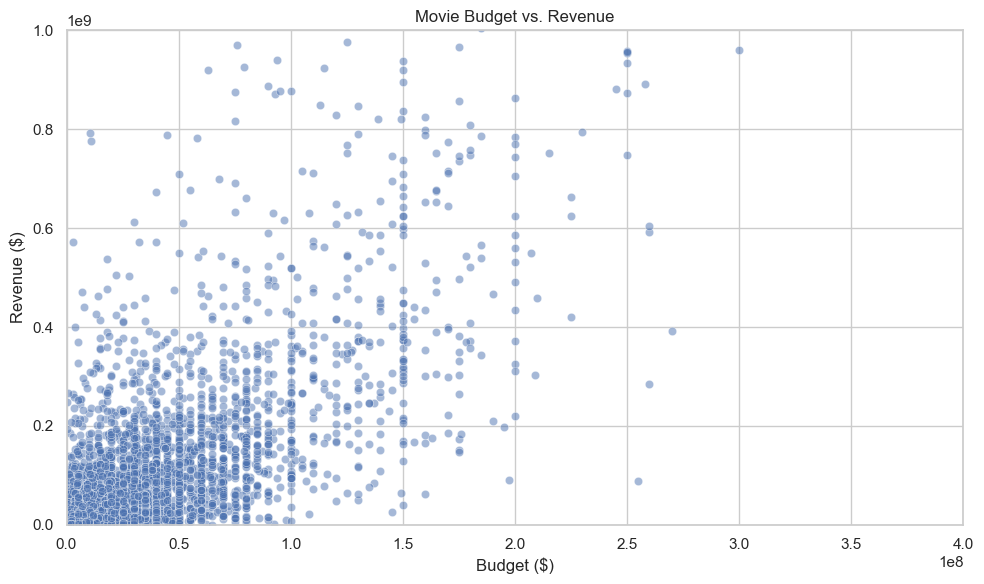

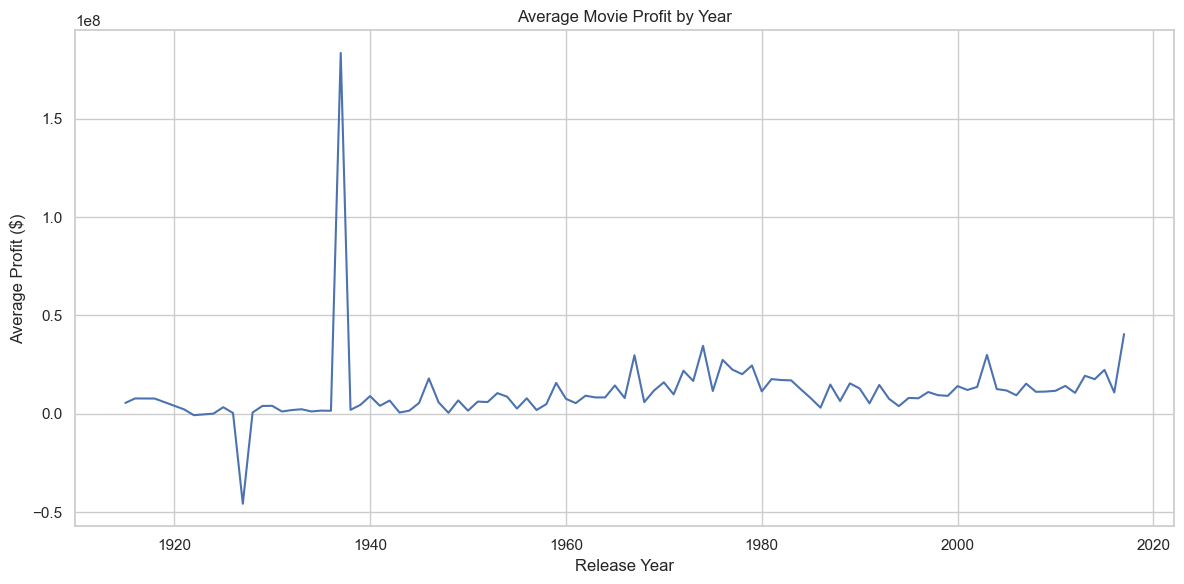

In [21]:
sns.set(style="whitegrid")

# Group by release year and get average profit
profit_by_year = df.groupby('release_year')['profit'].median().reset_index()

#Movie Budget vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.5)

plt.title('Movie Budget vs. Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.xlim(0, 4e8)  
plt.ylim(0, 1e9)
plt.tight_layout()
plt.show()

#Average Movie Profit by Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=profit_by_year, x='release_year', y='profit')
plt.title('Average Movie Profit by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Profit ($)')
plt.tight_layout()
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_24212\3045563801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit, x='profit', y='title', palette='viridis')


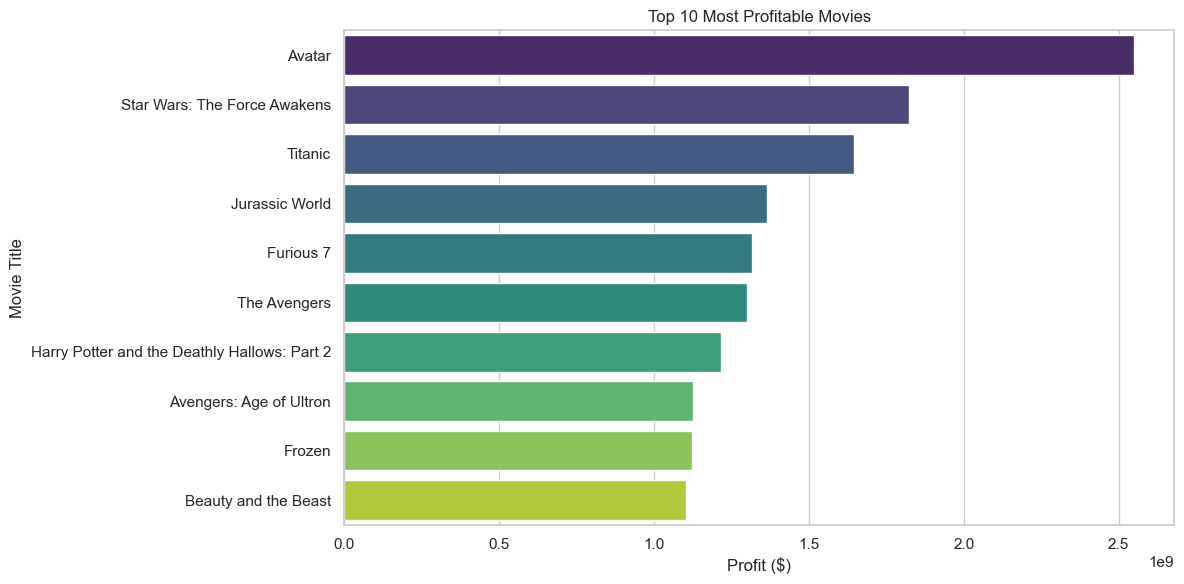

In [23]:
# Top 10 movies by profit
top_profit = df.sort_values(by='profit', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_profit, x='profit', y='title', palette='viridis')
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit ($)')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_24212\143018997.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flops, x='profit', y='title', palette='rocket')


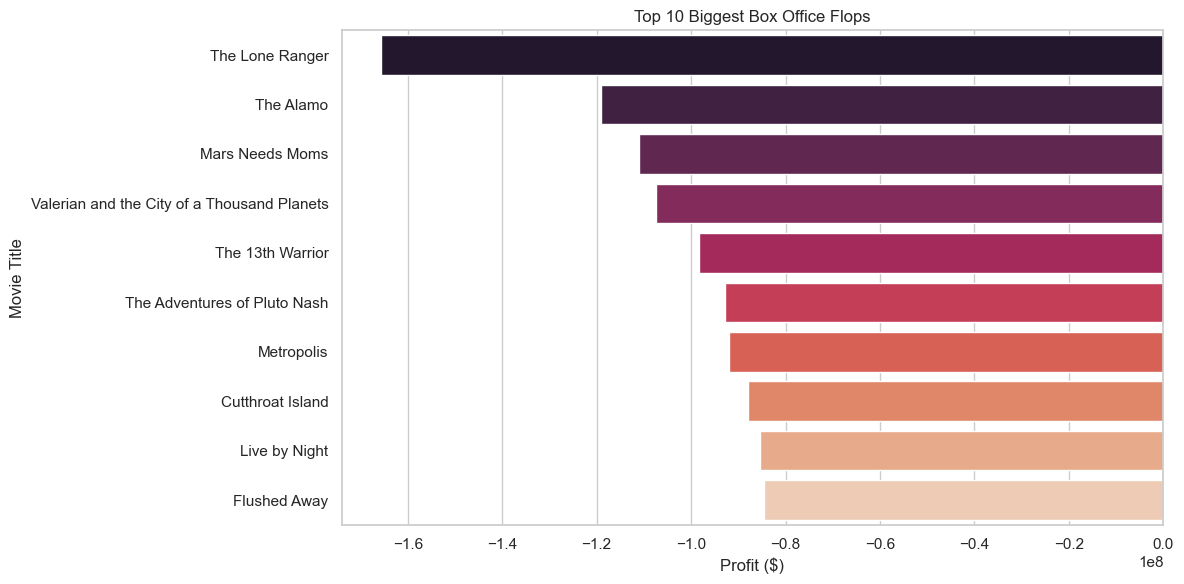

In [25]:
flops = df.sort_values(by='profit').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=flops, x='profit', y='title', palette='rocket')
plt.title('Top 10 Biggest Box Office Flops')
plt.xlabel('Profit ($)')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Optional: fill missing runtimes
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

# Feature & target setup
X = df[['budget', 'release_year', 'runtime']]
y = df['revenue']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² score: 0.5456825251810626
RMSE: 115030176.0622966


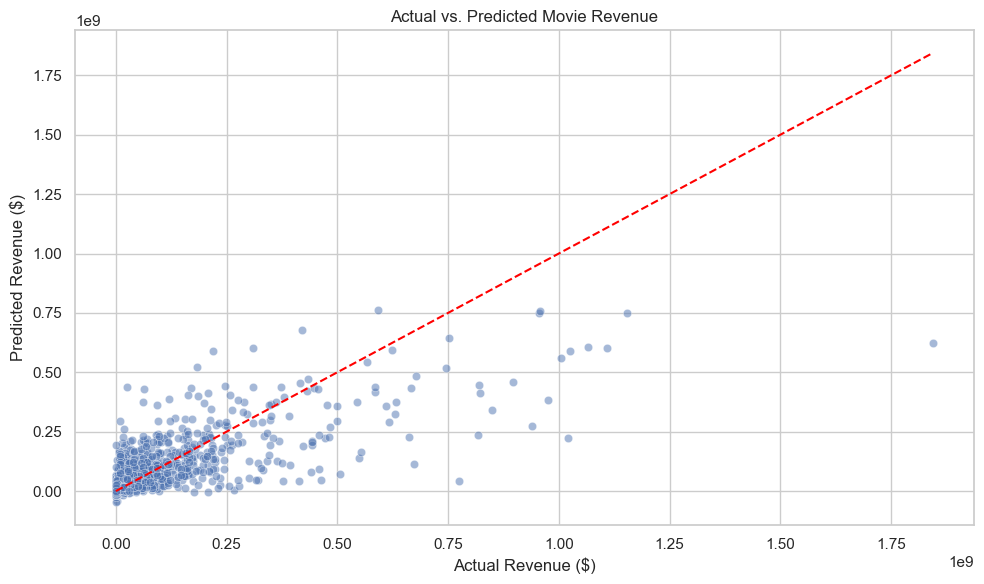

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

plt.xlabel('Actual Revenue ($)')
plt.ylabel('Predicted Revenue ($)')
plt.title('Actual vs. Predicted Movie Revenue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.tight_layout()
plt.show()

In [31]:
# Save average profit by year
profit_by_year.to_csv('C:\\Users\\david\\profit_by_year.csv', index=False)

# Save top 10 profitable movies
top_profit.to_csv('C:\\Users\\david\\top10_profitable.csv', index=False)

# Save top 10 biggest flops
flops.to_csv('C:\\Users\\david\\top10_flops.csv', index=False)

# Save actual vs. predicted revenue
actual_vs_pred = pd.DataFrame({
    'actual_revenue': y_test,
    'predicted_revenue': y_pred
})
actual_vs_pred.to_csv('C:\\Users\\david\\actual_vs_predicted.csv', index=False)

